<a href="https://colab.research.google.com/github/mafaldasalomao/Transfering_learning_TF-Fine_Tuning/blob/main/05_Transfering_learning_TF_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Oct  9 00:51:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
##Creating help functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-10-09 00:55:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-10-09 00:55:22 (78.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [5]:
#import help functions we're going

from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [3]:
#get some data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 

--2022-10-09 01:00:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  30.3MB/s    in 5.3s    

2022-10-09 01:00:59 (30.3 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [6]:
unzip_data("10_food_classes_10_percent.zip")

In [7]:


# Walk through 10 percent data directory and list number of files
walk_through_dir("10_food_classes_10_percent")



There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [9]:
# Create training and test directories
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"


In [11]:
import tensorflow as tf
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [12]:
# Check the training data datatype
train_data_10_percent


<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [13]:


# Check out the class names of our dataset
train_data_10_percent.class_names



['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [14]:
# See an example batch of data
for images, labels in train_data_10_percent.take(1):
  print(images, labels)


tf.Tensor(
[[[[2.46918365e+02 2.32918365e+02 2.45918365e+02]
   [2.44852036e+02 2.32852036e+02 2.44852036e+02]
   [2.40709183e+02 2.30352036e+02 2.44137756e+02]
   ...
   [1.88623238e+01 1.04235640e+01 4.71441650e+00]
   [2.13570900e+01 1.43570910e+01 8.35709095e+00]
   [1.79694824e+01 1.09694824e+01 4.96948242e+00]]

  [[2.46239792e+02 2.32239792e+02 2.45239792e+02]
   [2.46448990e+02 2.34448990e+02 2.46448990e+02]
   [2.46704086e+02 2.36346939e+02 2.50132660e+02]
   ...
   [1.95561676e+01 8.69902420e+00 2.62759590e+00]
   [2.66428318e+01 1.79183655e+01 1.07805986e+01]
   [2.03621140e+01 1.33621140e+01 7.36211348e+00]]

  [[2.46352036e+02 2.32352036e+02 2.45352036e+02]
   [2.41943878e+02 2.29943878e+02 2.41943878e+02]
   [2.40831635e+02 2.30474487e+02 2.44260208e+02]
   ...
   [2.27346630e+01 9.73466301e+00 2.96939087e+00]
   [2.50714798e+01 1.38011017e+01 7.30108786e+00]
   [2.85101147e+01 1.92958298e+01 1.18672571e+01]]

  ...

  [[1.06071556e+02 9.87143478e+01 1.19500084e+02]
   [1

In [30]:
#Create Functional API model 0
#1. create base model

base_model = tf.keras.applications.EfficientNetB0(include_top=False)

#2. freeze the base model(so the underlying pre-trained patterns aren't updated during training)
base_model.trainable = False;

#3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

#4. If using a model like Resnet50v2 normalize input
#x = tf.keras.experimental.preprocessing.Rescaling(1./255)(inputs)
#5. Pass the inputs to the base-model
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average poll the outputs of the base_models --- reduce of number computations
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after passing global_average_pooling_layer through base model: {x.shape}")

# 7. create the output activation layer

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# 8 combine the inputs with outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9 compile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# 10 fit the model and save its history
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
            steps_per_epoch=len(train_data_10_percent),
            validation_data = test_data_10_percent,
            validation_steps=int(0.25 * len(test_data_10_percent)),
            callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                   experiment_name="10_percent_feature_extraction")])

Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after passing global_average_pooling_layer through base model: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20221009-014943
Epoch 1/5
24/24 [==============================] - 11s 238ms/step - loss: 1.8903 - accuracy: 0.4373 - val_loss: 1.3506 - val_accuracy: 0.6908
Epoch 2/5
24/24 [==============================] - 5s 186ms/step - loss: 1.1407 - accuracy: 0.7467 - val_loss: 0.9040 - val_accuracy: 0.7977
Epoch 3/5
24/24 [==============================] - 4s 151ms/step - loss: 0.8373 - accuracy: 0.8173 - val_loss: 0.7583 - val_accuracy: 0.8043
Epoch 4/5
24/24 [==============================] - 5s 184ms/step - loss: 0.6865 - accuracy: 0.8520 - val_loss: 0.6637 - val_accuracy: 0.8273
Epoch 5/5
24/24 [==============================] - 5s 192ms/step - loss: 0.5964 - accuracy: 0.8640 - val_loss: 0.6094 - val_accuracy: 0.8306


In [18]:
model_0.evaluate(test_data_10_percent)

79/79 [==============================] - 6s 75ms/step - loss: 1.3458 - accuracy: 0.7184


[1.3457705974578857, 0.7184000015258789]

In [21]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_3
1 rescaling_2
2 normalization_2
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_d

In [22]:
# how about we get a summary of the base model
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_2 (Rescaling)        (None, None, None,   0           ['input_3[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_2 (Normalization  (None, None, None,   7          ['rescaling_2[0][0]']            
 )                              3)                                                   

In [23]:
model_0.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


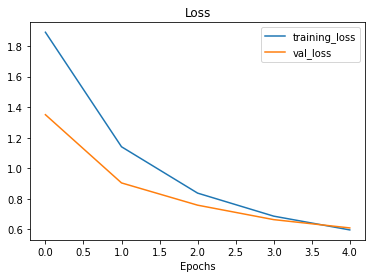

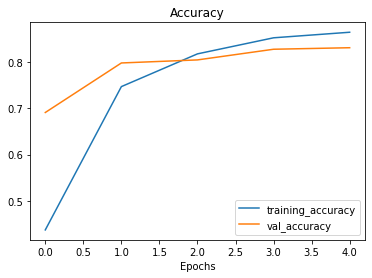

In [31]:
#curver loss curve
plot_loss_curves(history_10_percent)

In [29]:
## getting a feature vector from a trained model


{'loss': [1.9540094137191772],
 'accuracy': [0.35066667199134827],
 'val_loss': [1.3843857049942017],
 'val_accuracy': [0.7138158082962036]}